# Numerical Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [2]:
x = sympy.symbols("x")
f = sympy.exp(-x**2)
f

exp(-x**2)

In [3]:
sympy.integrate(f,(x, 0, 1))

sqrt(pi)*erf(1)/2

In [4]:
sympy.integrate(f,(x, 0, 1)).evalf(8)

0.74682413

0.7462110000000001

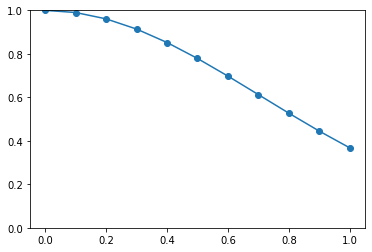

In [25]:
h = 0.1
def func(x):
    return np.exp(-x**2)

xs = []
ys = []
int_sum = 0
for i in range(11):
    x = np.round(h*i,3)
    y = np.round(func(x),5)
#     print('x = {:<3}, y = {:<3}'.format(x, y))
    if i == 0 or i == 10 :
        int_sum += h*y/2
    else:
        int_sum += h*y
    xs.append(x)
    ys.append(y)

plt.plot(xs,ys,'-o')
plt.ylim([0,1])

int_sum

In [ ]:
h = 0.1
def func(x):
    return np.exp(-x**2)

xs = []
ys = []
int_sum = 0
for i in range(11):
    x = np.round(h*i,3)
    y = np.round(func(x),5)
#     print('x = {:<3}, y = {:<3}'.format(x, y))
    if i == 0 or i == 10 :
        int_sum += h*y/2
    else:
        int_sum += h*y
    xs.append(x)
    ys.append(y)

plt.plot(xs,ys,'-o')
plt.ylim([0,1])

int_sum

# Numerical ODE

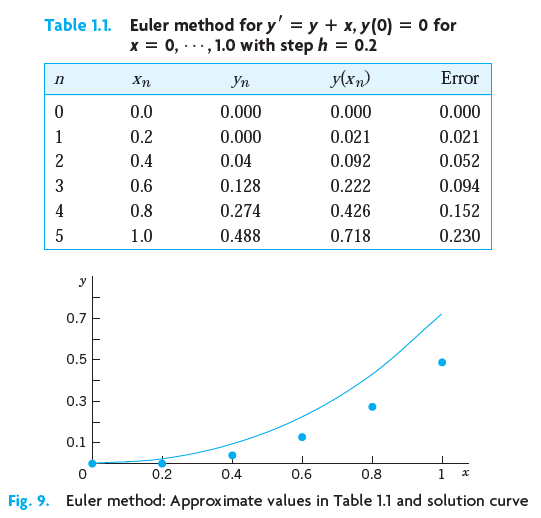

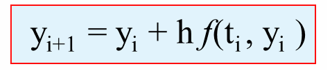

0.0 0
0.2 0.0
0.4 0.04
0.6 0.128
0.8 0.2736
1.0 0.48832
1.2 0.78598
1.4 1.18318
1.6 1.69982
1.8 2.35978
2.0 3.19174


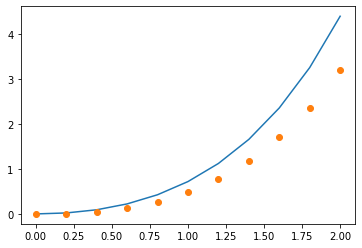

In [64]:
# y' = f(x,y) = x + y => y' - (x + y) = 0
def func(x,y):
    return x + y 

h = 0.2
xs = []
ys = []
y_num = []

yi = 0

yi1
for i in range(11):
    x = np.round(i*h,2)
    y = np.round(-x + np.exp(x) -1, 5)
    yi1 = np.round(yi + h*func(x,yi),5)
    
    xs.append(x)
    ys.append(y)
#     if i == 0:
#         y_num.append(yi)
#         print(x, yi)
    
    y_num.append(yi)
    print(x, yi)
    
    yi = yi1
    
plt.plot(xs, ys)
plt.plot(xs,y_num,'o')

In [36]:
x = sympy.symbols("x")
y = sympy.Function("y")
x + y(x)

x + y(x)

In [41]:
sympy.dsolve(y(x).diff(x) - (x + y(x))).simplify()

Eq(y(x), C1*exp(x) - x - 1)

In [43]:
sympy.dsolve(y(x).diff(x) - (x + y(x)), ics = {y(0): 0}).simplify()

Eq(y(x), -x + exp(x) - 1)

# Runge-Kutta

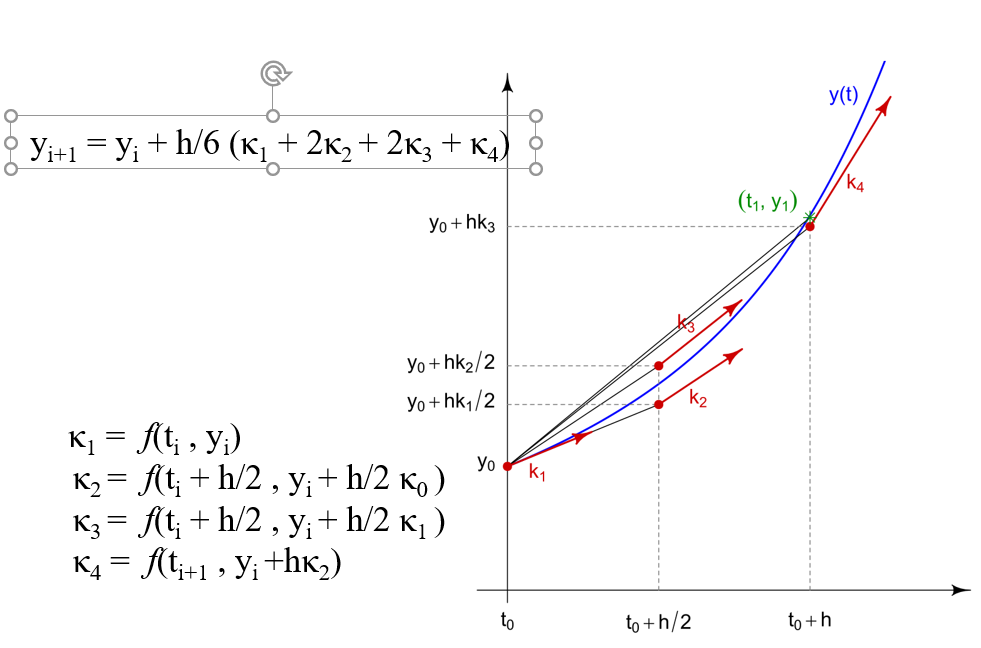

0.0 0
0.2 0.0214
0.4 0.09182
0.6 0.22211
0.8 0.42553
1.0 0.71826
1.2 1.12009
1.4 1.65516
1.6 2.35298
1.8 3.24958
2.0 4.38897


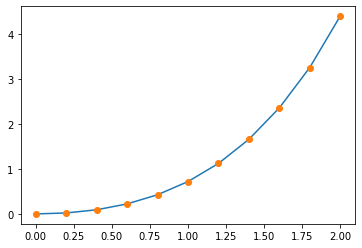

In [65]:
# y' = f(x,y) = x + y => y' - (x + y) = 0
def func(x,y):
    return x + y 

h = 0.2
xs = []
ys = []
y_num = []

yi = 0
yi1
for i in range(11):
    x = np.round(i*h,2)
    y = np.round(-x + np.exp(x) -1, 5)
    k1 = func(x,yi)
    k2 = func(x+h/2,y+h/2*k1)
    k3 = func(x+h/2,y+h/2*k2)
    k4 = func(x+h,y+h*k3)
    
    yi1 = np.round(yi + h*(k1+2*k2+2*k3+k4)/6,5)
    
    xs.append(x)
    ys.append(y)
#     if i == 0:
#         y_num.append(yi)
#         print(x, yi)
    
    y_num.append(yi)
    print(x, yi)
    
    yi = yi1
    
plt.plot(xs, ys)
plt.plot(xs,y_num,'o')

# Least Square

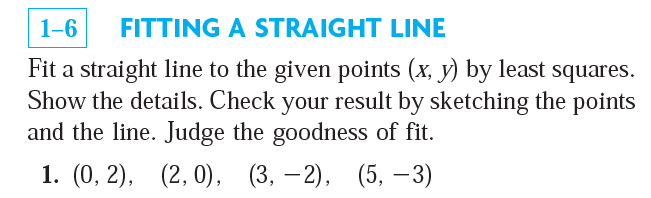

In [95]:
np.diag(S)

array([[6.38146401, 0.        ],
       [0.        , 1.13000756]])

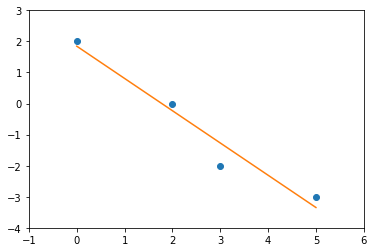

In [109]:
xs = np.array([0, 2, 3, 5])
ys = np.array([2, 0, -2, -3])
plt.plot(xs,ys,'o')
plt.xlim([-1, 6])
plt.ylim([-4, 3])

# a*x + b = y
# a*0 + b = 2
# a*2 + b = 0
# a*3 + b = -2
# a*5 + b = -3

A = np.stack((xs, np.ones(4))).T
U, S, VT = np.linalg.svd(A)
U, S, VT
pinv = VT.T@np.linalg.inv(np.diag(S))@U[:,:2].T
a, b = pinv@ys
y = xs*a+b
plt.plot(xs, y)


# Root of Equation


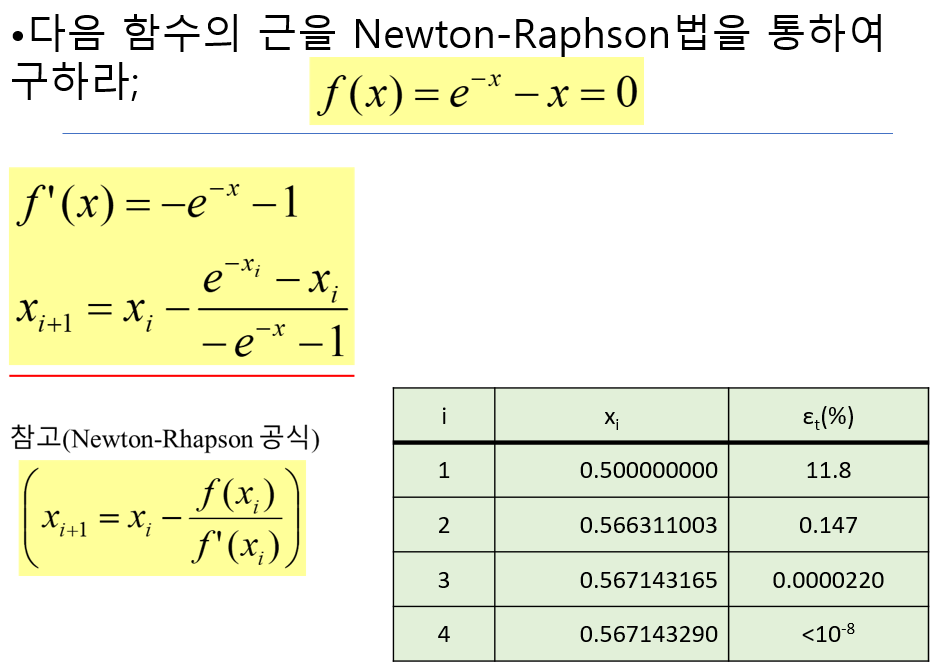

In [130]:
def f(x):
    return np.exp(-x)-x
def fp(x):
    return -np.exp(-x)-1

xi = 0.5
tor = 1e-8
for i in range(30):
    xi1 = xi - f(xi)/fp(xi)
    print('xi = {}, error = {}'.format(xi, abs((xi1-xi)/xi1)*100))
    if abs((xi1-xi)/xi) < tor:
        break
    xi = xi1

xi = 0.5, error = 11.709290976662396
xi = 0.5663110031972182, error = 0.14672870783743905
xi = 0.5671431650348622, error = 2.2106391984397623e-05
xi = 0.5671432904097811, error = 5.08968352942999e-13


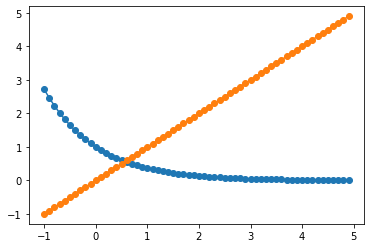

In [116]:
x = np.arange(-1,5,0.1)
y1 = np.exp(-x)
y2 = x
plt.plot(x,y1,'-o')
plt.plot(x,y2,'-o')

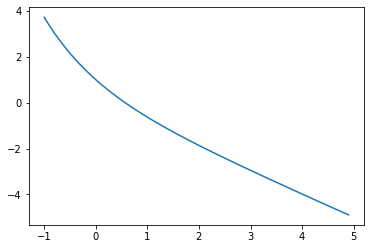

In [118]:
x = np.arange(-1,5,0.1)
y = np.exp(-x) - x
plt.plot(x,y)